# Nova Financial Solutions

## Setup and Imports

In [16]:
import sys
sys.path.append('..')  # Add parent directory to Python path

# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistics

In [17]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')

print("Dataset Info:")
print(df.info())

print("\nSample Data:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

Sample Data:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [20]:
#Descriptive Statistics (Headline Length)

df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))  # Faster than word_tokenize
print("\nHeadline Length Statistics:")
print(df['headline_length'].describe())


Headline Length Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64



Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


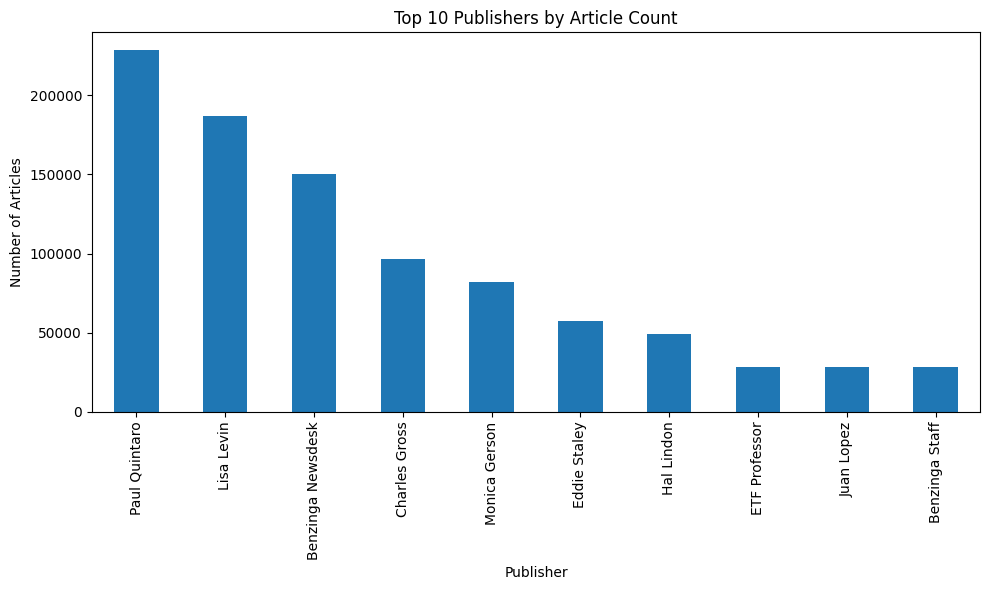

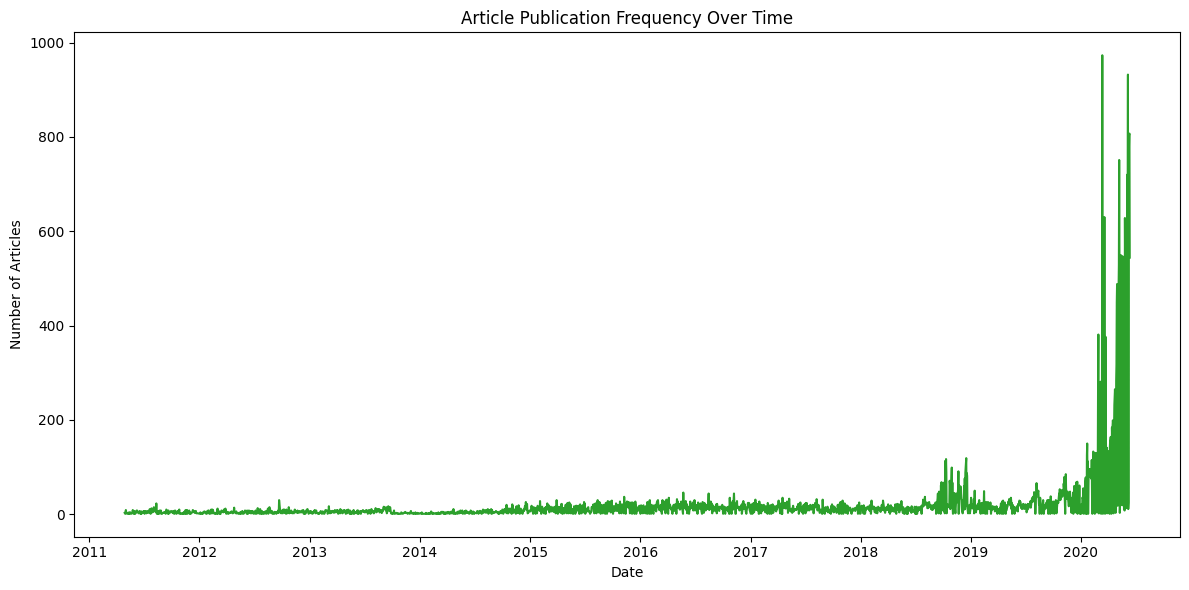

In [25]:
# Publisher Analysis 
publisher_counts = df['publisher'].value_counts()
print("\nTop 10 Publishers:")
print(publisher_counts.head(10))

# Visualization: Top 10 publishers
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar', color='#1f77b4')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.tight_layout()


# Publication Date Trends
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')
df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()

# Visualization: Publication frequency
plt.figure(figsize=(12, 6))
daily_counts.plot(color='#2ca02c')
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()